In [1]:
import pandas as pd
import jenkspy
import spacy
import uuid
from tqdm import tqdm
tqdm.pandas()

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pd.options.display.max_colwidth = 500

<ipython-input-2-7eab3a9fec6a>:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [ ]:
nlp = spacy.load('en_core_web_lg')

------

In [4]:
df = pd.read_csv(r"D:\Work\Coding\Data\some-news.csv")

In [5]:
#Cleaning up garbage I injected with a previous process
df = df.drop("Unnamed: 0", axis=1)
df = df.drop("Unnamed: 0.1", axis=1)
df['article'] = df['article'].astype(str)

In [6]:
df['GUID'] = [str(uuid.uuid4()) for x in range(len(df))]

In [7]:
df

,date,year,month,day,author,title,article,url,section,publication,GUID
0,09-12-16 18:31,2016,12,9,Lee Drutman,We should take concerns about the health of liberal democracy seriously,"This post is part of Polyarchy, an independent blog produced by the political reform program at New America, a Washington think tank devoted to developing new ideas and new voices. Imagine you are an otherwise healthy 30-something who starts feeling weird. You are sometimes short of breath. You get migraines. Your feet start to swell a little. But otherwise, everything seems fine. You go to the doctor. The doctor runs some tests. She tells you, It's probably nothing, but these could be signs...",https://www.vox.com/polyarchy/2016/12/9/13898340/democracy-warning-signs,NaN,Vox,c8db8638-8d73-4ef1-9008-9c1f9d28935d
1,07-10-16 21:26,2016,10,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contract makes it difficult to build the team,"The Indianapolis Colts made Andrew Luck the highest-paid player in NFL history this offseason with a five-year, $122-million contract with $89 million guaranteed. However, they're already finding that Luck's contract is inhibiting their ability to address weaknesses on other parts of the roster, particularly on defense. On Friday, Colts GM Ryan Grigson, who is under fire for the Colts 1-3 start, said that it's difficult to build up the team's defense with Luck making so much money. Accordin...",https://www.businessinsider.com/colts-gm-ryan-grigson-andrew-luck-contract-2016-10,NaN,Business Insider,98891c8c-3432-4858-99cb-14fa665bd09e
2,26-01-18 00:00,2018,1,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President Donald Trump denied a report on Friday that he had ordered Special Counsel Robert Mueller fired last June, calling it “fake news”. The New York Times reported on Thursday that Trump backed down from his order after the White House counsel threatened to resign rather than follow his directive, citing four people told of the matter. “Fake news, folks, fake news,” Trump told reporters in Davos, when asked about the report. Reporting by Steve Hol...",https://www.reuters.com/article/us-davos-meeting-trump-mueller/trump-denies-report-he-ordered-mueller-fired-idUSKBN1FF12A,Davos,Reuters,947418f4-1683-42a9-8804-11f7b317a7dd
3,27-06-19 00:00,2019,6,27,NaN,France's Sarkozy reveals his 'Passions' but insists no come-back on cards,"PARIS (Reuters) - Former French president Nicolas Sarkozy published a new memoir on Thursday but was quick to dismiss speculation he might return to politics to rescue his old center-right party, which has shed support since President Emmanuel Macron stormed to power. Entitled “Passions”, the autobiography documents Sarkozy’s rise to power, while hurling barbs at some of his former allies, including his prime minister Francois Fillon. During his time in office from 2007-2012, Sarkozy earne...",https://www.reuters.com/article/france-politics-sarkozy/frances-sarkozy-reveals-his-passions-but-insists-no-come-back-on-cards-idUSL8N23Y5AS,World News,Reuters,04c303ba-4b76-4b7a-97f6-4f713f652e13
4,27-01-16 00:00,2016,1,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's Funeral,"Paris Hilton arrived at LAX Wednesday dressed to pay her last respects to her uncle Monty Brinson. Paris flew in from Switzerland especially for the funeral of Brinson, who used to be married to her aunt Kim Richards. Monty died Sunday after a long battle with cancer ... and the loss is obviously hitting Paris hard. She posted a picture collage with Monty calling him an ""incredible man with such a huge heart."" R.I.P.",https://www.tmz.com/2016/01/27/paris-hilton-monty-brinson-funeral/,NaN,TMZ,77cd742b-2f72-4c10-81c7-3ce3ee5812f4
...,...,...,...,...,...,...,...,...,...,...,...
990,20-07-18 00:00,2018,7,20,NaN,Christian Bale Shows Off Extreme Weight Loss After Dick Cheney Role,"Christian Bale's ditched any vestige of Dick Cheney from his life, and by that we mean roughly 100 lbs ... i

In [8]:
def sent_tokenize(text):
# Uncomment the lines below if you're passing this off to folks that don't know how to set up NLP stuff
#     if not spacy:
#         import spacy
#         nlp = spacy.load('en_core_web_lg')
    doc = nlp(text)
    return [str(sent) for sent in doc.sents]    

------

In [9]:
df['sents'] = df['article'].progress_apply(sent_tokenize)

100%|████████████████████████████████████████████████████████████████████████████████| 995/995 [01:15<00:00, 13.25it/s]


------

In [10]:
df['sents'].explode()

0      This post is part of Polyarchy, an independent blog produced by the political reform program at New America, a Washington think tank devoted to developing new ideas and new voices.
0                                                                                                               Imagine you are an otherwise healthy 30-something who starts feeling weird.
0                                                                                                                                                        You are sometimes short of breath.
0                                                                                                                                                                        You get migraines.
0                                                                                                                                                        Your feet start to swell a little.
                                                            

In [11]:
df2 = df[['GUID', 'sents']].explode('sents')

In [12]:
df_counts = pd.DataFrame(pd.cut(
    df2["GUID"].value_counts(),
    bins=jenkspy.jenks_breaks(df2["GUID"].value_counts(), n_classes=4),
    labels=['bucket_1', 'bucket_2', 'bucket_3', 'bucket_4'],
    include_lowest=True))

In [13]:
df_counts['GUID'].value_counts()

bucket_1    704
bucket_2    237
bucket_3     51
bucket_4      3
Name: GUID, dtype: int64

<AxesSubplot:>

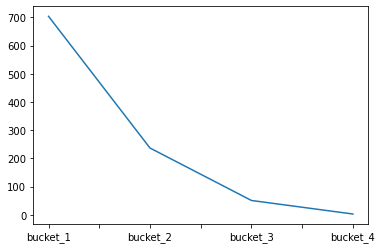

In [14]:
df_counts['GUID'].value_counts().plot()

In [15]:
df_counts = df_counts.reset_index().rename(columns={"GUID":"bucket",'index':"GUID"})
df_counts

,GUID,bucket
0,4432acd7-4c73-4bed-b378-3102b2bfa935,bucket_4
1,dc09aad9-fb21-4e12-933b-17a5613d0b10,bucket_4
2,debb17dc-fbf2-4512-97e8-f7e9d103804c,bucket_4
3,330afbd2-e259-453c-9c0b-224a0d5e3e26,bucket_3
4,54e4c6f8-e538-4e39-acb2-7a585585b4fc,bucket_3
...,...,...
990,696e61e8-62db-4f29-bfc5-8bd72c991831,bucket_1
991,97ac9759-0995-43e4-a3ee-3f5dd745d455,bucket_1
992,9fefff8d-ef06-417f-8c9d-086b9a49e5d6,bucket_1
993,954640f0-4678-48ce-bd7e-ec5396a1ea51,bucket_1


In [16]:
df2[df2['GUID']=='3d2caa77-352c-4936-b565-58c287ab5067']

,GUID,sents


<AxesSubplot:>

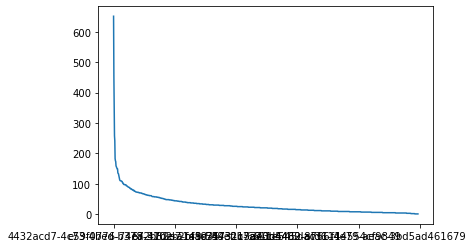

In [17]:
df2["GUID"].value_counts().plot()

In [19]:
df2.head(150)

,GUID,sents
0,c8db8638-8d73-4ef1-9008-9c1f9d28935d,"This post is part of Polyarchy, an independent blog produced by the political reform program at New America, a Washington think tank devoted to developing new ideas and new voices."
0,c8db8638-8d73-4ef1-9008-9c1f9d28935d,Imagine you are an otherwise healthy 30-something who starts feeling weird.
0,c8db8638-8d73-4ef1-9008-9c1f9d28935d,You are sometimes short of breath.
0,c8db8638-8d73-4ef1-9008-9c1f9d28935d,You get migraines.
0,c8db8638-8d73-4ef1-9008-9c1f9d28935d,Your feet start to swell a little.
0,c8db8638-8d73-4ef1-9008-9c1f9d28935d,"But otherwise, everything seems fine."
0,c8db8638-8d73-4ef1-9008-9c1f9d28935d,You go to the doctor.
0,c8db8638-8d73-4ef1-9008-9c1f9d28935d,The doctor runs some tests.
0,c8db8638-8d73-4ef1-9008-9c1f9d28935d,"She tells you, It's probably nothing, but these could be signs of a coming heart attack."
0,c8db8638-8d73-4ef1-9008-9c1f9d28935d,"You push for more certainty, but the doctor tells you she's not sure."
